In [2]:
import cv2
import numpy as np

# Load the input image
img = cv2.imread('coins.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply Sobel filter to detect edges in horizontal and vertical directions
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

# Combine the horizontal and vertical gradients to obtain the total gradient
grad = np.sqrt(sobelx**2 + sobely**2)

# Threshold the gradient to obtain the binary edge map
thresh = 0.1 * np.max(grad)
edges = np.zeros(grad.shape, dtype=np.uint8)
edges[grad >= thresh] = 255

# Display the input image and the binary edge map
cv2.imshow('Input', img)
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np

# Load the input image
img = cv2.imread('kids.tif')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute the Canny edges with automatic threshold computation
edges = cv2.Canny(blur, 50, 150)

# Display the input image and the binary edge map
cv2.imshow('Input', img)
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


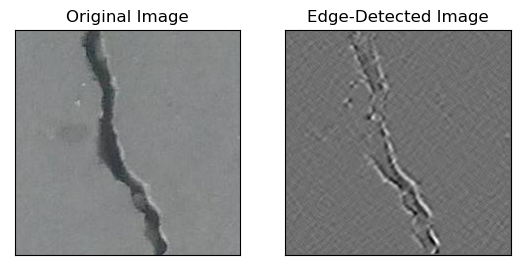

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert to grayscale
imgCrack = cv2.imread('00001.jpg')
imgGray = cv2.cvtColor(imgCrack, cv2.COLOR_BGR2GRAY)

# Apply Gaussian filter to the grayscale image
imgFiltCrack = cv2.GaussianBlur(imgGray, (0, 0), 1.5)

# Apply Sobel edge detection
imgEdgeCrack = cv2.Sobel(imgFiltCrack, cv2.CV_64F, 1, 1, ksize=3)

# Display the original image and the edge-detected image side by side
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(imgCrack, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(imgEdgeCrack, cmap='gray'), plt.title('Edge-Detected Image')
plt.xticks([]), plt.yticks([])
plt.show()


In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntRangeSlider

# Load image
img = cv2.imread('coins3.jpg')

# Define lower and upper bounds for radii of circles to be found
lowerBound = 60
upperBound = 80

# Resize image to reduce resolution and speed up processing
img = cv2.resize(img, (800, 600))

# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Find circles using Hough transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=lowerBound, maxRadius=upperBound)

# Convert coordinates and radii to integers
circles = np.round(circles[0, :]).astype("int")

# Define function to display image with circles and sliders
def display_image(radius_range):
    # Create copy of original image
    output = img.copy()

    # Loop over detected circles and draw them on output image
    for (x, y, r) in circles:
        if r >= radius_range[0] and r <= radius_range[1]:
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)

    # Display output image
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Define slider range based on radii distribution
min_radius = np.min(circles[:, 2])
max_radius = np.max(circles[:, 2])
slider_range = IntRangeSlider(value=(min_radius, max_radius), min=min_radius, max=max_radius, step=1)

# Display image with circles and sliders
interact(display_image, radius_range=slider_range)


interactive(children=(IntRangeSlider(value=(60, 68), description='radius_range', max=68, min=60), Output()), _…

<function __main__.display_image(radius_range)>